In [6]:
import numpy as np
import matplotlib.pyplot as plt

m = 100

x1 = 2*np.random.rand(m,1)

x1.shape


(100, 1)

In [7]:
x1

array([[0.51884233],
       [1.95954131],
       [1.30424486],
       [0.40586998],
       [0.88379693],
       [1.29055814],
       [1.21885569],
       [1.96609288],
       [0.78077568],
       [0.37073324],
       [0.89775563],
       [0.60683152],
       [1.08527011],
       [0.443019  ],
       [1.52335178],
       [1.26337868],
       [0.56618298],
       [0.46948449],
       [1.68135322],
       [1.97012571],
       [0.78903228],
       [1.5608244 ],
       [1.04698214],
       [1.27879293],
       [0.86069822],
       [1.68940745],
       [0.10021435],
       [1.57850108],
       [0.39453378],
       [1.68332249],
       [0.65407967],
       [1.39432244],
       [1.04368013],
       [1.65560217],
       [1.7607187 ],
       [0.53254947],
       [0.48327701],
       [1.81457705],
       [1.11173461],
       [0.31789169],
       [0.58348634],
       [0.22660983],
       [0.05139439],
       [1.85870233],
       [1.68552986],
       [1.5270869 ],
       [0.02339047],
       [1.019

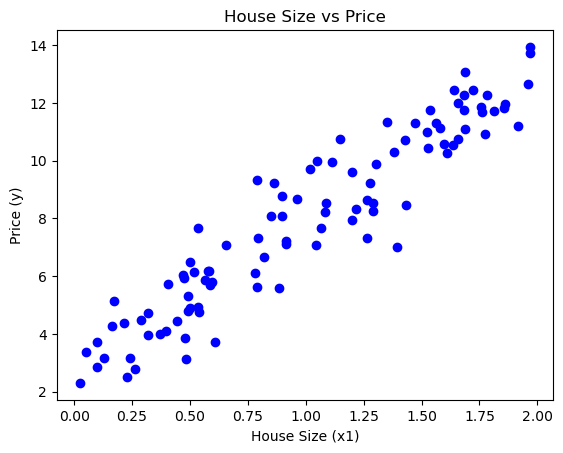

In [12]:
t0, t1 = 3, 5

y = t0 + t1*x1 + np.random.randn(m, 1) #linear regression eqn

# Visualize the data
plt.scatter(x1, y, color='blue', label='Data points')
plt.xlabel('House Size (x1)')
plt.ylabel('Price (y)')
plt.title('House Size vs Price')
plt.show()

In [14]:
x1_mean= np.mean(x1)
y_mean = np.mean(y)

# Step 2: Calculate the slope (theta_1)
numerator = np.sum((x1 - x1_mean) * (y - y_mean))
denominator = np.sum((x1 - x1_mean) ** 2)
theta_1_manual = numerator / denominator

# Step 3: Calculate the intercept (theta_0)
theta_0_manual = y_mean - (theta_1_manual * x1_mean)

In [15]:
# Print the results
print(f"Calculated theta_0 (Intercept): {theta_0_manual}")
print(f"Calculated theta_1 (Slope): {theta_1_manual}")

Calculated theta_0 (Intercept): 2.7501621911795393
Calculated theta_1 (Slope): 5.202028469389069


In [16]:
x1_test = 1.5

y_pred = theta_0_manual+theta_1_manual*x1_test
y_pred

10.553204895263143

In [17]:
import pandas as pd

# Create the dataset
data = {
    'town': ['monroe township', 'monroe township', 'monroe township', 'monroe township', 'monroe township',
             'west windsor', 'west windsor', 'west windsor', 'west windsor', 'robinsville', 'robinsville', 'robinsville', 'robinsville'],
    'area': [2600, 3000, 3200, 3600, 4000, 2600, 2800, 3300, 3600, 2600, 2900, 3100, 3600],
    'price': [550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000, 710000, 575000, 600000, 620000, 695000]
}

# Create the DataFrame
df = pd.DataFrame(data)

df



,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [18]:
df.town.unique()

array(['monroe township', 'west windsor', 'robinsville'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [20]:
le.fit(df.town)

LabelEncoder()

In [22]:
le.transform(df.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [24]:

le.fit_transform(df.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [25]:
df2= df.copy()
df2.town = le.fit_transform(df.town)
df2

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [31]:
pd.get_dummies(df) #onehotencoding

,area,price,town_monroe township,town_robinsville,town_west windsor
0,2600,550000,True,False,False
1,3000,565000,True,False,False
2,3200,610000,True,False,False
3,3600,680000,True,False,False
4,4000,725000,True,False,False
5,2600,585000,False,False,True
6,2800,615000,False,False,True
7,3300,650000,False,False,True
8,3600,710000,False,False,True
9,2600,575000,False,True,False


In [30]:
pd.get_dummies(df.town, drop_first=True) #onehotencoding

,area,price,town_robinsville,town_west windsor
0,2600,550000,False,False
1,3000,565000,False,False
2,3200,610000,False,False
3,3600,680000,False,False
4,4000,725000,False,False
5,2600,585000,False,True
6,2800,615000,False,True
7,3300,650000,False,True
8,3600,710000,False,True
9,2600,575000,True,False


In [29]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [32]:
# Apply One-Hot Encoding using pandas
df_encoded = pd.get_dummies(df, columns=['town'])

# Display the DataFrame with One-Hot Encoding applied
df_encoded.dtypes

area                    int64
price                   int64
town_monroe township     bool
town_robinsville         bool
town_west windsor        bool
dtype: object

In [33]:
df_encoded

,area,price,town_monroe township,town_robinsville,town_west windsor
0,2600,550000,True,False,False
1,3000,565000,True,False,False
2,3200,610000,True,False,False
3,3600,680000,True,False,False
4,4000,725000,True,False,False
5,2600,585000,False,False,True
6,2800,615000,False,False,True
7,3300,650000,False,False,True
8,3600,710000,False,False,True
9,2600,575000,False,True,False


In [34]:
	
def convert_bool_to_int(df):
    # Convert all boolean columns to int (0 and 1)
    bool_columns = df.select_dtypes(include='bool').columns
    df[bool_columns] = df[bool_columns].astype(int)
    return df

df_encoded = convert_bool_to_int(df_encoded)

# Display the updated DataFrame
print(df_encoded.dtypes)
df_encoded

area                    int64
price                   int64
town_monroe township    int64
town_robinsville        int64
town_west windsor       int64
dtype: object


,area,price,town_monroe township,town_robinsville,town_west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [35]:
X , y = df_encoded.area.values, df_encoded.price.values

In [37]:
df_encoded.area.values

array([2600, 3000, 3200, 3600, 4000, 2600, 2800, 3300, 3600, 2600, 2900,
       3100, 3600])

In [39]:
X, y.shape

(array([2600, 3000, 3200, 3600, 4000, 2600, 2800, 3300, 3600, 2600, 2900,
        3100, 3600]),
 (13,))

In [40]:
X.shape

(13,)

In [42]:
X = X.reshape(-1,1)
X

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000],
       [2600],
       [2800],
       [3300],
       [3600],
       [2600],
       [2900],
       [3100],
       [3600]])

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X

array([[0.        ],
       [0.28571429],
       [0.42857143],
       [0.71428571],
       [1.        ],
       [0.        ],
       [0.14285714],
       [0.5       ],
       [0.71428571],
       [0.        ],
       [0.21428571],
       [0.35714286],
       [0.71428571]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #x is input and independent variable and y is dependent.
X_train, X_test, y_train, y_test

(array([[0.71428571],
        [0.        ],
        [0.42857143],
        [0.28571429],
        [0.71428571],
        [1.        ],
        [0.5       ],
        [0.21428571],
        [0.71428571],
        [0.14285714]]),
 array([[0.35714286],
        [0.        ],
        [0.        ]]),
 array([710000, 585000, 610000, 565000, 695000, 725000, 650000, 600000,
        680000, 615000]),
 array([620000, 575000, 550000]))